### Hourly Trend Analysis

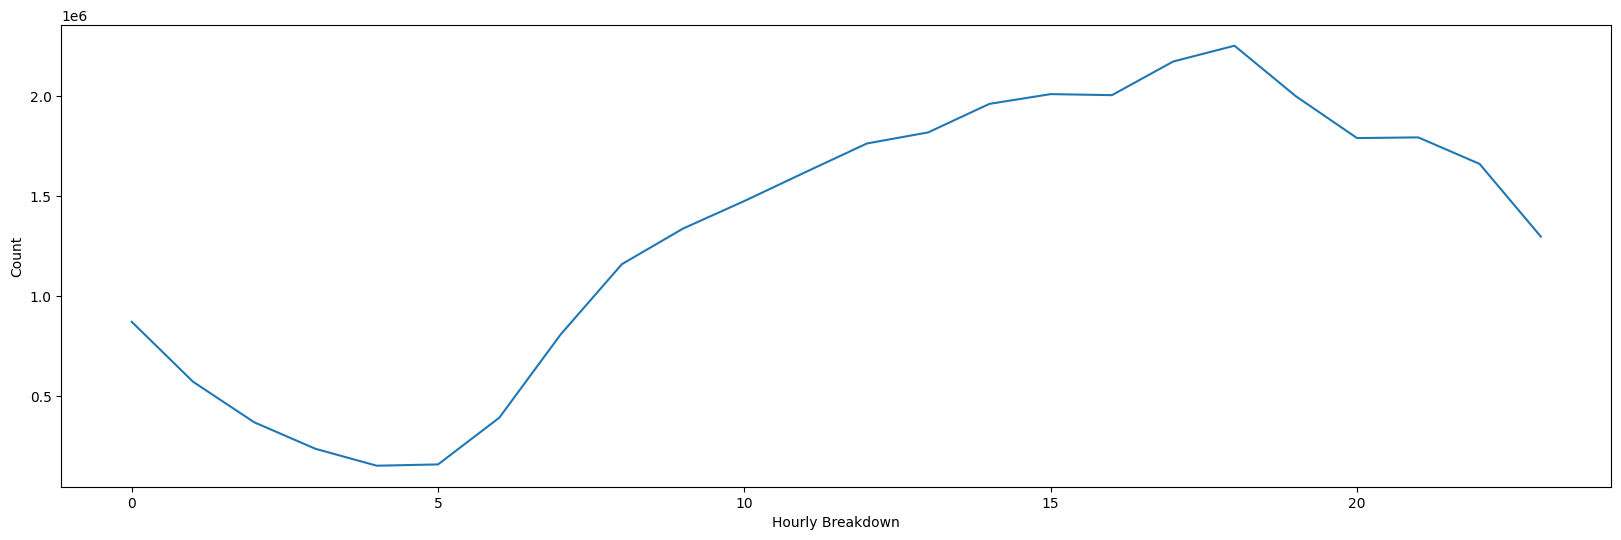

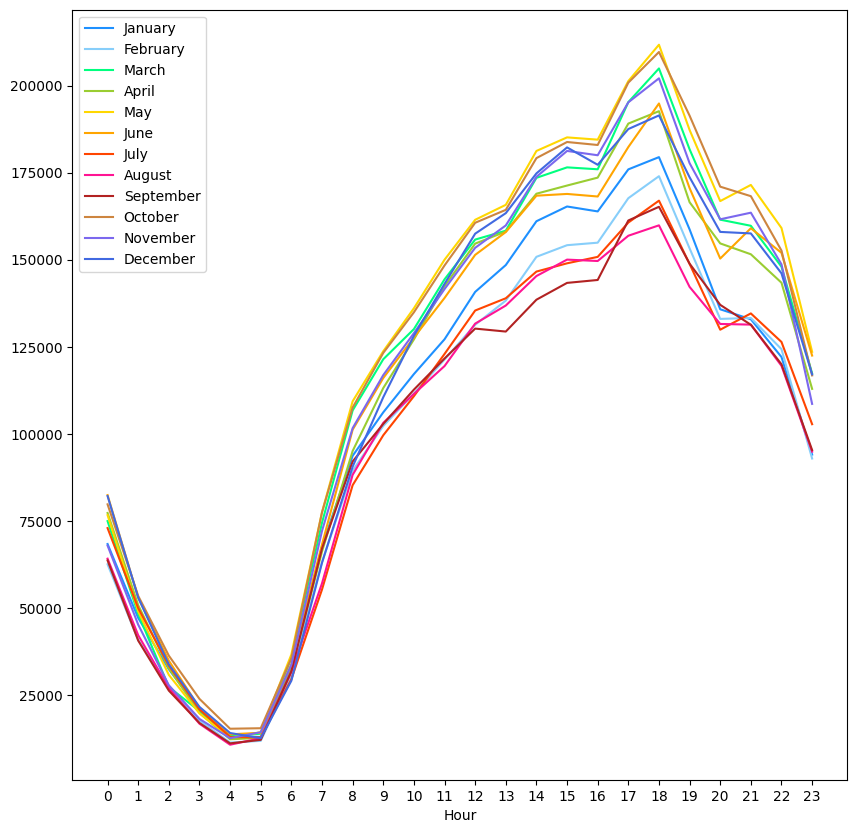

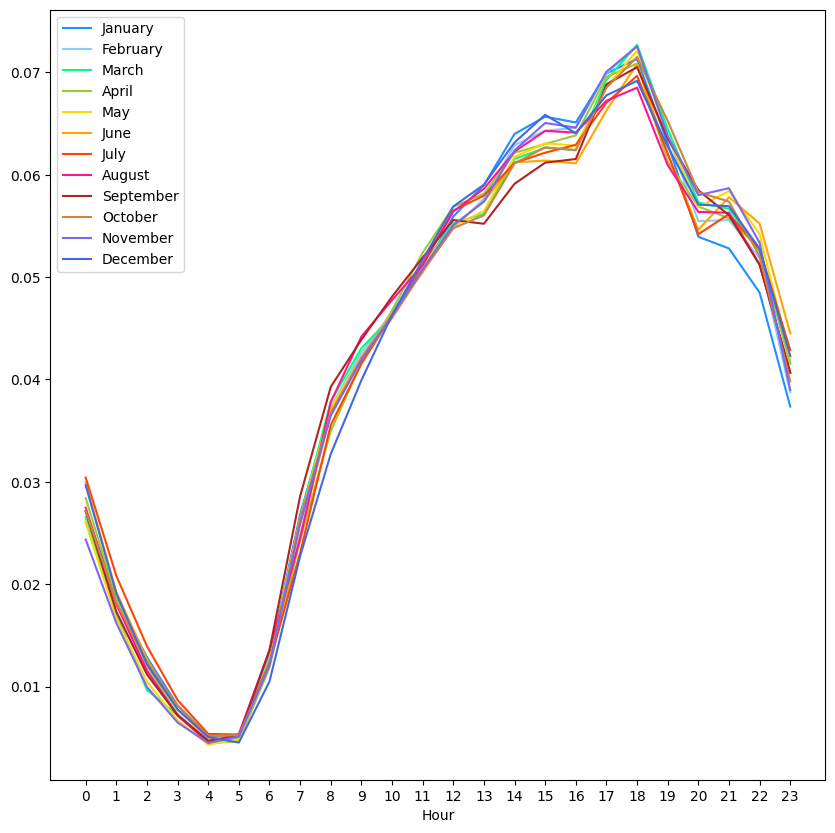

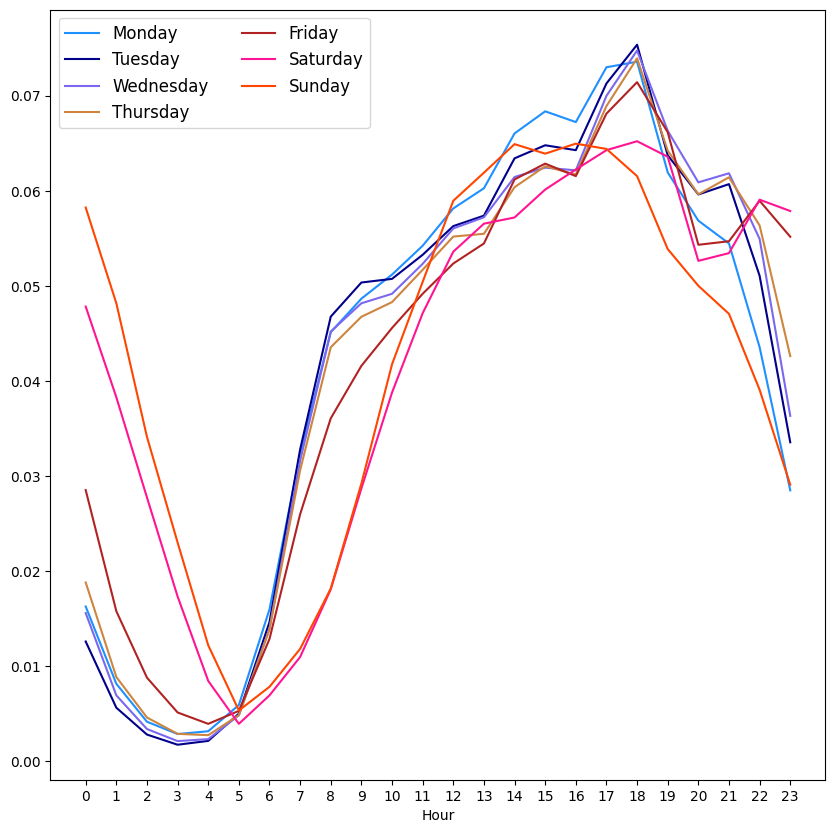

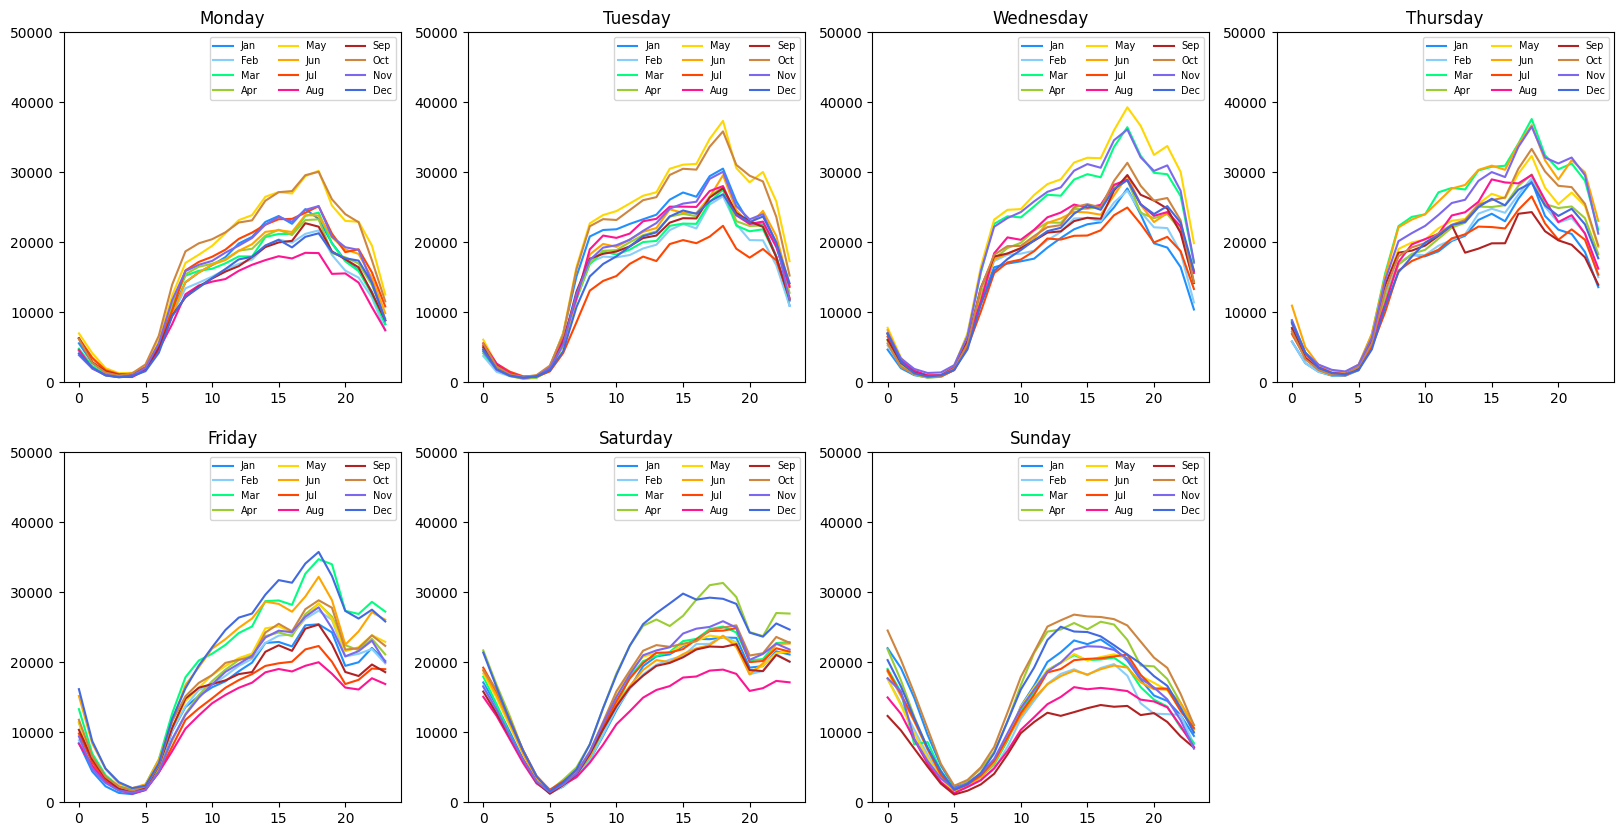

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

class HourlyTrendsAnalysis:
    def __init__(self, file_path):
        """Initialize the analysis with a parquet file path."""
        self.file_path = file_path
        self.df = None

    def load_data(self):
        """Load and preprocess the dataset."""
        self.df = pd.read_parquet(self.file_path)
        # Extract additional features from datetime columns
        self.df['month'] = self.df['tpep_pickup_datetime'].dt.month
        self.df['month_name'] = self.df['tpep_pickup_datetime'].dt.month_name()
        self.df['dayofweek'] = self.df['tpep_pickup_datetime'].dt.day_of_week
        self.df['day_name'] = self.df['tpep_pickup_datetime'].dt.day_name()
        self.df['time'] = self.df['tpep_pickup_datetime'].dt.hour
        self.df['dayofyear'] = self.df['tpep_pickup_datetime'].dt.dayofyear
        self.df['year'] = self.df['tpep_pickup_datetime'].dt.year
        self.df['duration'] = self.df['tpep_dropoff_datetime'] - self.df['tpep_pickup_datetime']
        # Filter based on ride duration
        self.df = self.df[(self.df['duration'] > pd.Timedelta(minutes=5)) &
                          (self.df['duration'] < pd.Timedelta(hours=5))]
        # Add year, week, and day information
        self.df[['year', 'week', 'day']] = self.df['tpep_pickup_datetime'].dt.isocalendar()[['year', 'week', 'day']]

    def aggregate_by_hour(self):
        """Aggregate and plot data by hour."""
        hourly_counts = self.df.groupby(self.df['tpep_pickup_datetime'].dt.hour).size()
        fig, ax = plt.subplots(figsize=(20, 6))
        ax.plot(hourly_counts)
        ax.set_xlabel('Hourly Breakdown')
        ax.set_ylabel('Count')
        plt.show()

    def aggregate_by_month(self, normalized=False):
        """Aggregate and plot data by months."""
        colors = ['dodgerblue', 'lightskyblue', 'springgreen', 'yellowgreen', 'gold', 'orange', 'orangered', 'deeppink',
                  'firebrick', 'peru', 'mediumslateblue', 'royalblue']
        fig, ax = plt.subplots(figsize=(10, 10))

        for m, group in self.df.groupby('month'):
            if normalized:
                data = group.time.value_counts(normalize=True, sort=False).sort_index()
            else:
                data = group.time.value_counts(sort=False).sort_index()
            ax.plot(data, label=group['month_name'].unique()[0], color=colors[m - 1])
            ax.set_xticks(range(0, 24, 1))
            ax.set_xlabel('Hour')

        plt.legend()
        plt.show()

    def aggregate_by_weekday(self):
        """Aggregate and plot data grouped by weekday."""
        colors = ['dodgerblue', 'lightskyblue', 'springgreen', 'yellowgreen', 'gold', 'orange', 'orangered', 'deeppink',
                  'firebrick', 'peru', 'mediumslateblue', 'darkblue']
        fig, ax = plt.subplots(figsize=(10, 10))

        for m, group in self.df.groupby('dayofweek'):
            data = group.time.value_counts(normalize=True, sort=False).sort_index()
            ax.plot(data, label=group['day_name'].unique()[0], color=colors[-m])
            ax.set_xticks(range(0, 24, 1))
            ax.set_xlabel('Hour')

        plt.legend(ncol=2, fontsize=12)
        plt.show()

    def weekday_month_analysis(self):
        """Analyze and visualize days of the week grouped by month."""
        colors = ['dodgerblue', 'lightskyblue', 'springgreen', 'yellowgreen', 'gold', 'orange', 'orangered', 'deeppink',
                  'firebrick', 'peru', 'mediumslateblue', 'royalblue']

        fig, axes = plt.subplots(2, 4, figsize=(20, 10))
        for i in sorted(self.df['dayofweek'].unique()):
            df = self.df[self.df['dayofweek'] == i]
            ax = axes.flatten()[i]
            for m, group in df.groupby('month'):
                data = group.time.value_counts(sort=False).sort_index()
                ax.plot(data, label=group['month_name'].unique()[0][:3], color=colors[m - 1])
            ax.set_ylim(0, 50000)
            ax.set_title(f"{df['day_name'].unique()[0]}")
            ax.legend(fontsize=7, ncol=3)

        fig.delaxes(axes.flatten()[-1])
        plt.show()


# Calling Functions
hta = HourlyTrendsAnalysis(file_path='/app/full_df.parquet')
hta.load_data()
hta.aggregate_by_hour()
hta.aggregate_by_month(normalized=False)
hta.aggregate_by_month(normalized=True)
hta.aggregate_by_weekday()
hta.weekday_month_analysis()